# Lead Scoring Case Study

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
# Read the data and do some basic stuffs.
df=pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [127]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [129]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Now we have to complete our case study by following these 3 steps.
 ## 1. Data Cleaning
 ## 2. Data Preparation
 ## 3.Model Building


### 1- Data Cleaning 

In [130]:
df=df.replace('Select',np.nan)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [131]:

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [132]:
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [133]:
df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
        'Asymmetrique Profile Score','Lead Profile','Lead Quality','Tags'],axis=1,inplace=True)

In [134]:
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [135]:
# we have to drop the columns having more than 60% NA values.
df=df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)),2)>45)].columns,1)

In [136]:
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [137]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [138]:
# Now we have to consider the Skewed categorical column for the dropping process in order to make the model better
# We have found that there are 5 columns which are highly skewed.i.e Country,What is your current occupation and
# What matters most to you in choosing a course,City,Specialiastion


In [139]:
df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [140]:
df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [141]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [142]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [143]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Netherlands                2
Italy                      2
China                      2
Belgium                    2
Ghana                      2
Bangladesh                 2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Liberia                    1
Kenya                      1
Denmark                    1
Vietnam       

In [144]:
# In Country column we have to combine the less percentage of distribution of data in a category named as "others".
# So that we can neglet the Country variable in creating dummies variable.


In [145]:
df['Country'] = df['Country'].replace(np.nan , 'others')

In [146]:
# Now we need to drop all these columns
df.drop(['City','Specialization','What is your current occupation','What matters most to you in choosing a course'],axis=1,inplace=True)

In [147]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [148]:

# Checking the % of missing values in rows after the complete process 
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [149]:


# we can drop rest of missing values as there value are quite negligible. so we need to drop those rows.
df.dropna(inplace=True)

In [150]:
round(100*(df.isnull().sum()/len(df.index)),2)



Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

### 2- Data preparation

In [151]:
# Creating Dummy variables for Categorical variables.
df1=pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity']], drop_first=True)

In [152]:
df1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df=pd.concat([df,df1],axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
# Now drop the original columns from the main data frame after concating.
df.drop(['Lead Origin', 'Lead Source', 'Last Activity'],axis=1,inplace=True)
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,No,0,0.0,0,0.0,others,No,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,No,0,5.0,674,2.5,India,No,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,No,1,2.0,1532,2.0,India,No,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,No,0,1.0,305,1.0,India,No,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,No,1,2.0,1428,1.0,India,No,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df.shape

(9074, 61)

In [156]:
df.dtypes

Prospect ID                                   object
Lead Number                                    int64
Do Not Email                                  object
Do Not Call                                   object
Converted                                      int64
                                               ...  
Last Activity_SMS Sent                         uint8
Last Activity_Unreachable                      uint8
Last Activity_Unsubscribed                     uint8
Last Activity_View in browser link Clicked     uint8
Last Activity_Visited Booth in Tradeshow       uint8
Length: 61, dtype: object

In [157]:
#Train-Test split
# first we need to divide the data to two data frames X and y .
X=df.drop(['Prospect ID','Lead Number','Converted','Do Not Email','Do Not Call','Country',
          'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
'Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview','Last Notable Activity'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
y=df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [159]:


# now we can split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=200)
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
3768,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4602,6.0,1028,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5792,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
875,5.0,75,2.5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7674,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:

#check the train test data
X_train.shape

(6351, 42)

In [161]:
y_train.head()

3768    0
4602    1
5792    1
875     0
7674    1
Name: Converted, dtype: int64

In [162]:
y_train.shape

(6351,)

In [163]:
X_test.shape

(2723, 42)

In [164]:
y_test.shape

(2723,)

In [165]:
# perform the scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [166]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
3768,-0.679725,-0.882806,-1.072278,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4602,0.500894,1.000345,1.638892,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5792,-0.679725,-0.882806,-1.072278,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
875,0.304124,-0.745416,0.057376,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7674,-0.679725,-0.882806,-1.072278,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3- Model Building

In [167]:
# importing statsmodel for model building procedure
import statsmodels.api as sm

In [168]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.7
Date:                Mon, 07 Sep 2020   Deviance:                       5693.3
Time:                        12:51:04   Pearson chi2:                 6.77e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         23.9268   4.21e+04      0.001      1.000   -8.25e+04    8.25e+04
TotalVisits                                    0.2744      0.064      4.318      0.000       0.150       0.399
Total Time Spent on Website                    1.1456      0.039     29.445      0.000       1.069       1.222
Page Views Per Visit                          -0.1470      0.051     -2.862      0.004      -0.248      -0.046
Lead Origin_Landing Page Submission           -0.1036      0.097     -1.071      0.284      -0.293       0.086
Lead Origin_Lead Add Form                      1.5440      1.393      1.108      0.268      -1.186       4.274
Lead Origin_Lead Import                        0.1234      0.968      0.128      0.899      -1.773       2.020
Lead Source_Direct Traffic                    -1.0707      1.878     -0.570      0.569      -4.751       2.610
Lead Source_Facebook                           0.1234      0.968      0.128      0.899      -1.773       2.020
Lead Source_Google                            -0.7375      1.876     -0.393      0.694      -4.415       2.939
Lead Source_Live Chat                         22.0946   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                            22.6262   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                         0.1848      1.876      0.099      0.922      -3.492       3.862
Lead Source_Organic Search                    -0.8903      1.879     -0.474      0.636      -4.572       2.792
Lead Source_Pay per Click Ads                -22.5155   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                    -23.9645   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                          1.8959      1.279      1.482      0.138      -0.611       4.403
Lead Source_Referral Sites                    -1.1430      1.897     -0.603      0.547      -4.860       2.574
Lead Source_Social Media                       1.3512      2.369      0.570      0.569      -3.293       5.995
Lead Source_WeLearn                           22.3818   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                   2.8556      1.448      1.972      0.049       0.017       5.694
Lead Source_bing                              -0.4679      2.259     -0.207      0.836      -4.896       3.960
Lead Source_blog                           -6.123e-11   3.87e-07     -0.000      1.000    -7.6e-07    7.59e-07
Lead Source_google                           -23.3106   4.29e+04     -0.001      1.000   -8.41e+04    8.41e+04
Lead Source_testone                          -22.2280   7.95e+04     -0.000      1.000

In [169]:
# Model building by using the RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [170]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked'],
      dtype='object')

In [171]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.6
Date:                Mon, 07 Sep 2020   Deviance:                       5733.3
Time:                        12:51:05   Pearson chi2:                 6.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.8408      0.764     -1.101      0.271      -2.338       0.656
Total Time Spent on Website                    1.1515      0.039     29.693      0.000       1.075       1.227
Lead Origin_Lead Add Form                      2.2472      1.005      2.235      0.025       0.277       4.218
Lead Source_Direct Traffic                    -0.4558      0.766     -0.595      0.552      -1.957       1.045
Lead Source_Facebook                           0.9383      0.899      1.044      0.297      -0.824       2.700
Lead Source_Google                            -0.0956      0.765     -0.125      0.901      -1.595       1.404
Lead Source_NC_EDM                            22.4596   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                         0.8908      0.767      1.161      0.246      -0.613       2.394
Lead Source_Organic Search                    -0.2189      0.769     -0.285      0.776      -1.725       1.287
Lead Source_Press_Release                    -22.7115   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                          1.8868      0.926      2.038      0.042       0.073       3.701
Lead Source_Referral Sites                    -0.4520      0.811     -0.557      0.578      -2.042       1.138
Lead Source_Social Media                       1.8571      1.623      1.144      0.253      -1.324       5.038
Lead Source_Welingak Website                   2.8383      1.148      2.473      0.013       0.589       5.088
Lead Source_google                           -21.8682   2.62e+04     -0.001      0.999   -5.14e+04    5.13e+04
Last Activity_Converted to Lead               -1.1281      0.197     -5.734      0.000      -1.514      -0.742
Last Activity_Email Bounced                   -2.2057      0.330     -6.687      0.000      -2.852      -1.559
Last Activity_Email Link Clicked              -0.4197      0.198     -2.117      0.034      -0.808      -0.031
Last Activity_Email Received                  22.4543   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Last Activity_Form Submitted on Website       -0.8513      0.327     -2.603      0.009      -1.492      -0.210
Last Activity_Had a Phone Conversation         1.7222      0.739      2.330      0.020       0.274       3.171
Last Activity_Olark Chat Conversation         -1.6943      0.159    -10.684      0.000      -2.005      -1.383
Last Activity_Page Visited on Website         -0.6381      0.143     -4.465      0.000      -0.918      -0.358
Last Activity_SMS Sent                         1.0718      0.075     14.372      0.000       0.926       1.218
Last Activity_Unsubscribed                    -0.4662      0.422     -1.105      0.269

#### Checking VIF score

In [172]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,51.98
9,Lead Source_Reference,40.88
12,Lead Source_Welingak Website,12.16
22,Last Activity_SMS Sent,1.81
6,Lead Source_Olark Chat,1.71
20,Last Activity_Olark Chat Conversation,1.51
4,Lead Source_Google,1.49
2,Lead Source_Direct Traffic,1.48
0,Total Time Spent on Website,1.30
7,Lead Source_Organic Search,1.24


In [173]:
#Lead Source Direct Traffic Variable is dropped due to high P-value.
X=col.drop('Lead Source_Direct Traffic',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked'],
      dtype='object')

In [174]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.8
Date:                Mon, 07 Sep 2020   Deviance:                       5733.6
Time:                        12:51:06   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.2935      0.075    -17.257      0.000      -1.440      -1.147
Total Time Spent on Website                    1.1510      0.039     29.690      0.000       1.075       1.227
Lead Origin_Lead Add Form                      2.5629      0.864      2.968      0.003       0.870       4.255
Lead Source_Facebook                           1.3906      0.481      2.892      0.004       0.448       2.333
Lead Source_Google                             0.3572      0.084      4.264      0.000       0.193       0.521
Lead Source_NC_EDM                            22.9127   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                         1.3429      0.111     12.139      0.000       1.126       1.560
Lead Source_Organic Search                     0.2341      0.108      2.161      0.031       0.022       0.446
Lead Source_Press_Release                    -22.2582   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                          2.0234      0.893      2.265      0.024       0.272       3.775
Lead Source_Referral Sites                     0.0006      0.284      0.002      0.998      -0.556       0.558
Lead Source_Social Media                       2.3097      1.434      1.611      0.107      -0.501       5.121
Lead Source_Welingak Website                   2.9750      1.122      2.652      0.008       0.776       5.174
Lead Source_google                           -21.4153   2.62e+04     -0.001      0.999   -5.14e+04    5.13e+04
Last Activity_Converted to Lead               -1.1281      0.197     -5.735      0.000      -1.514      -0.743
Last Activity_Email Bounced                   -2.2067      0.330     -6.690      0.000      -2.853      -1.560
Last Activity_Email Link Clicked              -0.4202      0.198     -2.120      0.034      -0.809      -0.032
Last Activity_Email Received                  22.4547   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Last Activity_Form Submitted on Website       -0.8517      0.327     -2.604      0.009      -1.493      -0.211
Last Activity_Had a Phone Conversation         1.7220      0.739      2.330      0.020       0.274       3.170
Last Activity_Olark Chat Conversation         -1.6942      0.159    -10.684      0.000      -2.005      -1.383
Last Activity_Page Visited on Website         -0.6380      0.143     -4.464      0.000      -0.918      -0.358
Last Activity_SMS Sent                         1.0713      0.075     14.368      0.000       0.925       1.217
Last Activity_Unsubscribed                    -0.4553      0.422     -1.079      0.281      -1.283       0.372
Last Activity_View in browser link Clicked   -20.9271   2.36e+04     -0.001      0.999

In [175]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,51.98
8,Lead Source_Reference,40.88
11,Lead Source_Welingak Website,12.16
5,Lead Source_Olark Chat,1.66
19,Last Activity_Olark Chat Conversation,1.46
21,Last Activity_SMS Sent,1.44
3,Lead Source_Google,1.34
0,Total Time Spent on Website,1.28
6,Lead Source_Organic Search,1.16
20,Last Activity_Page Visited on Website,1.08


In [176]:
#Lead Source google Variable is dropped due to high P-value.
X=X.drop('Lead Source_google',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked'],
      dtype='object')

In [177]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.7
Date:                Mon, 07 Sep 2020   Deviance:                       5735.4
Time:                        12:51:06   Pearson chi2:                 6.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.2956      0.075    -17.284      0.000      -1.442      -1.149
Total Time Spent on Website                    1.1513      0.039     29.697      0.000       1.075       1.227
Lead Origin_Lead Add Form                      2.5654      0.863      2.971      0.003       0.873       4.258
Lead Source_Facebook                           1.3931      0.481      2.897      0.004       0.451       2.336
Lead Source_Google                             0.3599      0.084      4.297      0.000       0.196       0.524
Lead Source_NC_EDM                            22.9145   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                         1.3457      0.111     12.165      0.000       1.129       1.562
Lead Source_Organic Search                     0.2368      0.108      2.187      0.029       0.025       0.449
Lead Source_Press_Release                    -22.2497   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                          2.0238      0.893      2.265      0.023       0.273       3.775
Lead Source_Referral Sites                     0.0034      0.284      0.012      0.990      -0.554       0.560
Lead Source_Social Media                       2.3154      1.434      1.614      0.106      -0.496       5.127
Lead Source_Welingak Website                   2.9754      1.122      2.652      0.008       0.777       5.174
Last Activity_Converted to Lead               -1.1280      0.197     -5.734      0.000      -1.514      -0.742
Last Activity_Email Bounced                   -2.2064      0.330     -6.689      0.000      -2.853      -1.560
Last Activity_Email Link Clicked              -0.4203      0.198     -2.120      0.034      -0.809      -0.032
Last Activity_Email Received                  22.4537   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Last Activity_Form Submitted on Website       -0.8519      0.327     -2.605      0.009      -1.493      -0.211
Last Activity_Had a Phone Conversation         1.7213      0.739      2.329      0.020       0.273       3.170
Last Activity_Olark Chat Conversation         -1.6947      0.159    -10.687      0.000      -2.006      -1.384
Last Activity_Page Visited on Website         -0.6448      0.143     -4.516      0.000      -0.925      -0.365
Last Activity_SMS Sent                         1.0704      0.075     14.358      0.000       0.924       1.217
Last Activity_Unsubscribed                    -0.4552      0.422     -1.078      0.281      -1.283       0.372
Last Activity_View in browser link Clicked   -20.9271   2.36e+04     -0.001      0.999   -4.62e+04    4.61e+04
======================================================================================

In [178]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,51.98
8,Lead Source_Reference,40.88
11,Lead Source_Welingak Website,12.16
5,Lead Source_Olark Chat,1.66
18,Last Activity_Olark Chat Conversation,1.46
20,Last Activity_SMS Sent,1.43
3,Lead Source_Google,1.34
0,Total Time Spent on Website,1.28
6,Lead Source_Organic Search,1.16
19,Last Activity_Page Visited on Website,1.08


In [179]:
X=X.drop('Lead Source_Organic Search',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked'],
      dtype='object')

In [180]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2870.1
Date:                Mon, 07 Sep 2020   Deviance:                       5740.2
Time:                        12:51:07   Pearson chi2:                 6.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.2212      0.066    -18.425      0.000      -1.351      -1.091
Total Time Spent on Website                    1.1520      0.039     29.707      0.000       1.076       1.228
Lead Origin_Lead Add Form                      2.5131      0.863      2.913      0.004       0.822       4.204
Lead Source_Facebook                           1.3188      0.480      2.750      0.006       0.379       2.259
Lead Source_Google                             0.2839      0.076      3.739      0.000       0.135       0.433
Lead Source_NC_EDM                            22.8396   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                         1.2694      0.105     12.144      0.000       1.065       1.474
Lead Source_Press_Release                    -22.3212   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                          2.0014      0.893      2.242      0.025       0.251       3.751
Lead Source_Referral Sites                    -0.0727      0.282     -0.258      0.797      -0.625       0.480
Lead Source_Social Media                       2.2376      1.435      1.560      0.119      -0.575       5.050
Lead Source_Welingak Website                   2.9532      1.121      2.634      0.008       0.755       5.151
Last Activity_Converted to Lead               -1.1184      0.197     -5.690      0.000      -1.504      -0.733
Last Activity_Email Bounced                   -2.2047      0.329     -6.697      0.000      -2.850      -1.559
Last Activity_Email Link Clicked              -0.4188      0.198     -2.115      0.034      -0.807      -0.031
Last Activity_Email Received                  22.4548   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Last Activity_Form Submitted on Website       -0.8579      0.326     -2.628      0.009      -1.498      -0.218
Last Activity_Had a Phone Conversation         1.7736      0.740      2.397      0.017       0.324       3.224
Last Activity_Olark Chat Conversation         -1.6842      0.158    -10.635      0.000      -1.995      -1.374
Last Activity_Page Visited on Website         -0.6487      0.143     -4.537      0.000      -0.929      -0.368
Last Activity_SMS Sent                         1.0730      0.075     14.401      0.000       0.927       1.219
Last Activity_Unsubscribed                    -0.4563      0.423     -1.080      0.280      -1.285       0.372
Last Activity_View in browser link Clicked   -20.9393   2.36e+04     -0.001      0.999   -4.63e+04    4.62e+04
==============================================================================================================
"""

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,51.97
7,Lead Source_Reference,40.88
10,Lead Source_Welingak Website,12.16
5,Lead Source_Olark Chat,1.65
17,Last Activity_Olark Chat Conversation,1.43
19,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.30
0,Total Time Spent on Website,1.27
18,Last Activity_Page Visited on Website,1.05
13,Last Activity_Email Link Clicked,1.04


In [182]:
X=X.drop('Last Activity_Email Received',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked'],
      dtype='object')

In [183]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.4
Date:                Mon, 07 Sep 2020   Deviance:                       5742.7
Time:                        12:51:08   Pearson chi2:                 6.51e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.2202      0.066    -18.413      0.000      -1.350      -1.090
Total Time Spent on Website                    1.1525      0.039     29.721      0.000       1.077       1.229
Lead Origin_Lead Add Form                      2.5127      0.863      2.913      0.004       0.822       4.203
Lead Source_Facebook                           1.3188      0.480      2.750      0.006       0.379       2.259
Lead Source_Google                             0.2867      0.076      3.777      0.000       0.138       0.436
Lead Source_NC_EDM                            21.8381   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                         1.2700      0.105     12.149      0.000       1.065       1.475
Lead Source_Press_Release                    -21.3207   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Reference                          2.0023      0.893      2.243      0.025       0.252       3.752
Lead Source_Referral Sites                    -0.0729      0.282     -0.258      0.796      -0.626       0.480
Lead Source_Social Media                       2.2387      1.435      1.560      0.119      -0.574       5.051
Lead Source_Welingak Website                   2.9539      1.121      2.634      0.008       0.756       5.152
Last Activity_Converted to Lead               -1.1209      0.197     -5.702      0.000      -1.506      -0.736
Last Activity_Email Bounced                   -2.2067      0.329     -6.703      0.000      -2.852      -1.561
Last Activity_Email Link Clicked              -0.4207      0.198     -2.124      0.034      -0.809      -0.032
Last Activity_Form Submitted on Website       -0.8608      0.326     -2.636      0.008      -1.501      -0.221
Last Activity_Had a Phone Conversation         1.7709      0.740      2.394      0.017       0.321       3.221
Last Activity_Olark Chat Conversation         -1.6860      0.158    -10.646      0.000      -1.996      -1.376
Last Activity_Page Visited on Website         -0.6510      0.143     -4.553      0.000      -0.931      -0.371
Last Activity_SMS Sent                         1.0710      0.074     14.377      0.000       0.925       1.217
Last Activity_Unsubscribed                    -0.4585      0.423     -1.085      0.278      -1.287       0.370
Last Activity_View in browser link Clicked   -19.9412   1.43e+04     -0.001      0.999   -2.81e+04     2.8e+04
==============================================================================================================
"""

In [184]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,51.97
7,Lead Source_Reference,40.88
10,Lead Source_Welingak Website,12.16
5,Lead Source_Olark Chat,1.65
16,Last Activity_Olark Chat Conversation,1.43
18,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.30
0,Total Time Spent on Website,1.27
17,Last Activity_Page Visited on Website,1.05
13,Last Activity_Email Link Clicked,1.04


In [185]:
X=X.drop('Last Activity_View in browser link Clicked',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [186]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.1
Date:                Mon, 07 Sep 2020   Deviance:                       5744.2
Time:                        12:51:08   Pearson chi2:                 6.52e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2217      0.066    -18.437      0.000      -1.352      -1.092
Total Time Spent on Website                 1.1533      0.039     29.744      0.000       1.077       1.229
Lead Origin_Lead Add Form                   2.5143      0.863      2.915      0.004       0.824       4.205
Lead Source_Facebook                        1.3206      0.480      2.754      0.006       0.381       2.261
Lead Source_Google                          0.2862      0.076      3.771      0.000       0.137       0.435
Lead Source_NC_EDM                         20.8390   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                      1.2696      0.105     12.148      0.000       1.065       1.474
Lead Source_Press_Release                 -20.3216   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Reference                       2.0021      0.893      2.242      0.025       0.252       3.752
Lead Source_Referral Sites                 -0.0724      0.282     -0.257      0.797      -0.625       0.480
Lead Source_Social Media                    2.2385      1.435      1.560      0.119      -0.574       5.051
Lead Source_Welingak Website                2.9538      1.121      2.634      0.008       0.756       5.152
Last Activity_Converted to Lead            -1.1197      0.197     -5.695      0.000      -1.505      -0.734
Last Activity_Email Bounced                -2.2056      0.329     -6.699      0.000      -2.851      -1.560
Last Activity_Email Link Clicked           -0.4190      0.198     -2.115      0.034      -0.807      -0.031
Last Activity_Form Submitted on Website    -0.8593      0.327     -2.632      0.008      -1.499      -0.219
Last Activity_Had a Phone Conversation      1.7727      0.740      2.396      0.017       0.322       3.223
Last Activity_Olark Chat Conversation      -1.6841      0.158    -10.634      0.000      -1.994      -1.374
Last Activity_Page Visited on Website      -0.6497      0.143     -4.544      0.000      -0.930      -0.369
Last Activity_SMS Sent                      1.0727      0.074     14.400      0.000       0.927       1.219
Last Activity_Unsubscribed                 -0.4571      0.423     -1.081      0.280      -1.286       0.371
===========================================================================================================
"""

In [187]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,51.97
7,Lead Source_Reference,40.88
10,Lead Source_Welingak Website,12.16
5,Lead Source_Olark Chat,1.65
16,Last Activity_Olark Chat Conversation,1.43
18,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.30
0,Total Time Spent on Website,1.27
17,Last Activity_Page Visited on Website,1.05
13,Last Activity_Email Link Clicked,1.04


In [188]:
X=X.drop('Lead Source_NC_EDM',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [189]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.9
Date:                Mon, 07 Sep 2020   Deviance:                       5745.9
Time:                        12:51:09   Pearson chi2:                 6.52e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2196      0.066    -18.417      0.000      -1.349      -1.090
Total Time Spent on Website                 1.1536      0.039     29.750      0.000       1.078       1.230
Lead Origin_Lead Add Form                   2.5133      0.863      2.914      0.004       0.823       4.204
Lead Source_Facebook                        1.3190      0.480      2.751      0.006       0.379       2.259
Lead Source_Google                          0.2847      0.076      3.752      0.000       0.136       0.433
Lead Source_Olark Chat                      1.2684      0.104     12.139      0.000       1.064       1.473
Lead Source_Press_Release                 -20.3226   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Reference                       2.0018      0.893      2.242      0.025       0.252       3.752
Lead Source_Referral Sites                 -0.0740      0.282     -0.262      0.793      -0.627       0.479
Lead Source_Social Media                    2.2375      1.435      1.559      0.119      -0.575       5.050
Lead Source_Welingak Website                2.9535      1.121      2.634      0.008       0.756       5.151
Last Activity_Converted to Lead            -1.1214      0.197     -5.704      0.000      -1.507      -0.736
Last Activity_Email Bounced                -2.2074      0.329     -6.704      0.000      -2.853      -1.562
Last Activity_Email Link Clicked           -0.4203      0.198     -2.121      0.034      -0.809      -0.032
Last Activity_Form Submitted on Website    -0.8606      0.327     -2.635      0.008      -1.501      -0.221
Last Activity_Had a Phone Conversation      1.7715      0.740      2.394      0.017       0.321       3.222
Last Activity_Olark Chat Conversation      -1.6851      0.158    -10.640      0.000      -1.995      -1.375
Last Activity_Page Visited on Website      -0.6513      0.143     -4.555      0.000      -0.932      -0.371
Last Activity_SMS Sent                      1.0713      0.074     14.384      0.000       0.925       1.217
Last Activity_Unsubscribed                 -0.4586      0.423     -1.085      0.278      -1.287       0.370
===========================================================================================================
"""

In [190]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,51.97
6,Lead Source_Reference,40.88
9,Lead Source_Welingak Website,12.16
4,Lead Source_Olark Chat,1.65
15,Last Activity_Olark Chat Conversation,1.43
17,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.30
0,Total Time Spent on Website,1.27
16,Last Activity_Page Visited on Website,1.05
12,Last Activity_Email Link Clicked,1.04


In [191]:
X=X.drop('Lead Source_Reference',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [192]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.8
Date:                Mon, 07 Sep 2020   Deviance:                       5749.7
Time:                        12:51:10   Pearson chi2:                 6.52e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2186      0.066    -18.406      0.000      -1.348      -1.089
Total Time Spent on Website                 1.1530      0.039     29.733      0.000       1.077       1.229
Lead Origin_Lead Add Form                   4.4283      0.236     18.751      0.000       3.965       4.891
Lead Source_Facebook                        1.3174      0.480      2.747      0.006       0.377       2.257
Lead Source_Google                          0.2826      0.076      3.723      0.000       0.134       0.431
Lead Source_Olark Chat                      1.2652      0.105     12.104      0.000       1.060       1.470
Lead Source_Press_Release                 -20.3214   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Referral Sites                 -0.0754      0.282     -0.267      0.789      -0.628       0.477
Lead Source_Social Media                    2.2361      1.435      1.558      0.119      -0.577       5.049
Lead Source_Welingak Website                1.0367      0.753      1.377      0.168      -0.439       2.512
Last Activity_Converted to Lead            -1.1211      0.197     -5.703      0.000      -1.506      -0.736
Last Activity_Email Bounced                -2.2071      0.329     -6.703      0.000      -2.852      -1.562
Last Activity_Email Link Clicked           -0.4144      0.198     -2.097      0.036      -0.802      -0.027
Last Activity_Form Submitted on Website    -0.8566      0.326     -2.627      0.009      -1.496      -0.218
Last Activity_Had a Phone Conversation      1.7727      0.740      2.397      0.017       0.323       3.222
Last Activity_Olark Chat Conversation      -1.6827      0.158    -10.630      0.000      -1.993      -1.372
Last Activity_Page Visited on Website      -0.6525      0.143     -4.560      0.000      -0.933      -0.372
Last Activity_SMS Sent                      1.0720      0.074     14.399      0.000       0.926       1.218
Last Activity_Unsubscribed                 -0.4564      0.422     -1.081      0.280      -1.284       0.371
===========================================================================================================
"""

In [193]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.64
1,Lead Origin_Lead Add Form,1.43
14,Last Activity_Olark Chat Conversation,1.43
16,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.30
0,Total Time Spent on Website,1.27
8,Lead Source_Welingak Website,1.27
15,Last Activity_Page Visited on Website,1.05
11,Last Activity_Email Link Clicked,1.04
9,Last Activity_Converted to Lead,1.03


In [194]:
X=X.drop('Lead Source_Welingak Website',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [195]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.1
Date:                Mon, 07 Sep 2020   Deviance:                       5752.1
Time:                        12:51:10   Pearson chi2:                 6.49e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2184      0.066    -18.404      0.000      -1.348      -1.089
Total Time Spent on Website                 1.1531      0.039     29.734      0.000       1.077       1.229
Lead Origin_Lead Add Form                   4.5721      0.225     20.291      0.000       4.130       5.014
Lead Source_Facebook                        1.3172      0.480      2.747      0.006       0.377       2.257
Lead Source_Google                          0.2826      0.076      3.723      0.000       0.134       0.431
Lead Source_Olark Chat                      1.2657      0.105     12.108      0.000       1.061       1.471
Lead Source_Press_Release                 -20.3218   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Referral Sites                 -0.0749      0.282     -0.266      0.791      -0.628       0.478
Lead Source_Social Media                    2.2369      1.435      1.559      0.119      -0.576       5.050
Last Activity_Converted to Lead            -1.1214      0.197     -5.704      0.000      -1.507      -0.736
Last Activity_Email Bounced                -2.2075      0.329     -6.704      0.000      -2.853      -1.562
Last Activity_Email Link Clicked           -0.4207      0.198     -2.124      0.034      -0.809      -0.032
Last Activity_Form Submitted on Website    -0.8620      0.327     -2.637      0.008      -1.503      -0.221
Last Activity_Had a Phone Conversation      1.7711      0.740      2.393      0.017       0.321       3.222
Last Activity_Olark Chat Conversation      -1.6848      0.158    -10.635      0.000      -1.995      -1.374
Last Activity_Page Visited on Website      -0.6526      0.143     -4.562      0.000      -0.933      -0.372
Last Activity_SMS Sent                      1.0720      0.074     14.403      0.000       0.926       1.218
Last Activity_Unsubscribed                 -0.4598      0.423     -1.087      0.277      -1.289       0.369
===========================================================================================================
"""

In [196]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.64
13,Last Activity_Olark Chat Conversation,1.43
15,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.30
0,Total Time Spent on Website,1.27
1,Lead Origin_Lead Add Form,1.16
14,Last Activity_Page Visited on Website,1.05
10,Last Activity_Email Link Clicked,1.04
8,Last Activity_Converted to Lead,1.03
11,Last Activity_Form Submitted on Website,1.02


In [197]:
X=X.drop('Lead Source_Press_Release',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [198]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.6
Date:                Mon, 07 Sep 2020   Deviance:                       5753.3
Time:                        12:51:11   Pearson chi2:                 6.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2187      0.066    -18.409      0.000      -1.348      -1.089
Total Time Spent on Website                 1.1526      0.039     29.727      0.000       1.077       1.229
Lead Origin_Lead Add Form                   4.5723      0.225     20.292      0.000       4.131       5.014
Lead Source_Facebook                        1.3171      0.480      2.747      0.006       0.377       2.257
Lead Source_Google                          0.2837      0.076      3.737      0.000       0.135       0.432
Lead Source_Olark Chat                      1.2658      0.105     12.108      0.000       1.061       1.471
Lead Source_Referral Sites                 -0.0736      0.282     -0.261      0.794      -0.626       0.479
Lead Source_Social Media                    2.2412      1.435      1.561      0.118      -0.572       5.055
Last Activity_Converted to Lead            -1.1212      0.197     -5.704      0.000      -1.506      -0.736
Last Activity_Email Bounced                -2.2071      0.329     -6.704      0.000      -2.852      -1.562
Last Activity_Email Link Clicked           -0.4207      0.198     -2.124      0.034      -0.809      -0.032
Last Activity_Form Submitted on Website    -0.8620      0.327     -2.638      0.008      -1.503      -0.222
Last Activity_Had a Phone Conversation      1.7708      0.740      2.393      0.017       0.320       3.221
Last Activity_Olark Chat Conversation      -1.6849      0.158    -10.636      0.000      -1.995      -1.374
Last Activity_Page Visited on Website      -0.6602      0.143     -4.618      0.000      -0.940      -0.380
Last Activity_SMS Sent                      1.0720      0.074     14.403      0.000       0.926       1.218
Last Activity_Unsubscribed                 -0.4598      0.423     -1.087      0.277      -1.289       0.369
===========================================================================================================
"""

In [199]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.64
12,Last Activity_Olark Chat Conversation,1.43
14,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.30
0,Total Time Spent on Website,1.27
1,Lead Origin_Lead Add Form,1.16
9,Last Activity_Email Link Clicked,1.04
13,Last Activity_Page Visited on Website,1.04
7,Last Activity_Converted to Lead,1.03
10,Last Activity_Form Submitted on Website,1.02


In [200]:
X=X.drop('Lead Source_Referral Sites',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [201]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.7
Date:                Mon, 07 Sep 2020   Deviance:                       5753.3
Time:                        12:51:11   Pearson chi2:                 6.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2214      0.065    -18.680      0.000      -1.350      -1.093
Total Time Spent on Website                 1.1527      0.039     29.731      0.000       1.077       1.229
Lead Origin_Lead Add Form                   4.5750      0.225     20.324      0.000       4.134       5.016
Lead Source_Facebook                        1.3197      0.479      2.753      0.006       0.380       2.259
Lead Source_Google                          0.2861      0.075      3.799      0.000       0.139       0.434
Lead Source_Olark Chat                      1.2686      0.104     12.196      0.000       1.065       1.472
Lead Source_Social Media                    2.2445      1.435      1.564      0.118      -0.569       5.058
Last Activity_Converted to Lead            -1.1215      0.197     -5.705      0.000      -1.507      -0.736
Last Activity_Email Bounced                -2.2059      0.329     -6.701      0.000      -2.851      -1.561
Last Activity_Email Link Clicked           -0.4218      0.198     -2.130      0.033      -0.810      -0.034
Last Activity_Form Submitted on Website    -0.8622      0.327     -2.639      0.008      -1.503      -0.222
Last Activity_Had a Phone Conversation      1.7698      0.740      2.390      0.017       0.319       3.221
Last Activity_Olark Chat Conversation      -1.6858      0.158    -10.646      0.000      -1.996      -1.375
Last Activity_Page Visited on Website      -0.6605      0.143     -4.620      0.000      -0.941      -0.380
Last Activity_SMS Sent                      1.0729      0.074     14.431      0.000       0.927       1.219
Last Activity_Unsubscribed                 -0.4640      0.423     -1.098      0.272      -1.293       0.365
===========================================================================================================
"""

In [202]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.64
11,Last Activity_Olark Chat Conversation,1.42
13,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.29
0,Total Time Spent on Website,1.27
1,Lead Origin_Lead Add Form,1.16
8,Last Activity_Email Link Clicked,1.04
12,Last Activity_Page Visited on Website,1.04
6,Last Activity_Converted to Lead,1.03
9,Last Activity_Form Submitted on Website,1.02


In [203]:
X=X.drop('Last Activity_Unsubscribed',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent'],
      dtype='object')

In [204]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.3
Date:                Mon, 07 Sep 2020   Deviance:                       5754.6
Time:                        12:51:11   Pearson chi2:                 6.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2293      0.065    -18.900      0.000      -1.357      -1.102
Total Time Spent on Website                 1.1528      0.039     29.736      0.000       1.077       1.229
Lead Origin_Lead Add Form                   4.5779      0.225     20.338      0.000       4.137       5.019
Lead Source_Facebook                        1.3262      0.480      2.765      0.006       0.386       2.266
Lead Source_Google                          0.2873      0.075      3.816      0.000       0.140       0.435
Lead Source_Olark Chat                      1.2715      0.104     12.226      0.000       1.068       1.475
Lead Source_Social Media                    2.2459      1.435      1.565      0.118      -0.567       5.059
Last Activity_Converted to Lead            -1.1141      0.196     -5.671      0.000      -1.499      -0.729
Last Activity_Email Bounced                -2.1987      0.329     -6.680      0.000      -2.844      -1.554
Last Activity_Email Link Clicked           -0.4153      0.198     -2.098      0.036      -0.803      -0.027
Last Activity_Form Submitted on Website    -0.8555      0.327     -2.619      0.009      -1.496      -0.215
Last Activity_Had a Phone Conversation      1.7769      0.740      2.400      0.016       0.326       3.228
Last Activity_Olark Chat Conversation      -1.6800      0.158    -10.614      0.000      -1.990      -1.370
Last Activity_Page Visited on Website      -0.6533      0.143     -4.574      0.000      -0.933      -0.373
Last Activity_SMS Sent                      1.0799      0.074     14.570      0.000       0.935       1.225
===========================================================================================================
"""

In [205]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.64
11,Last Activity_Olark Chat Conversation,1.42
13,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.29
0,Total Time Spent on Website,1.27
1,Lead Origin_Lead Add Form,1.16
8,Last Activity_Email Link Clicked,1.04
12,Last Activity_Page Visited on Website,1.04
6,Last Activity_Converted to Lead,1.03
9,Last Activity_Form Submitted on Website,1.02


In [206]:
X=X.drop('Lead Source_Social Media',1)
X

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent'],
      dtype='object')

In [207]:
X_train_sm = sm.add_constant(X_train[X])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.4
Date:                Mon, 07 Sep 2020   Deviance:                       5756.7
Time:                        12:51:12   Pearson chi2:                 6.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2277      0.065    -18.883      0.000      -1.355      -1.100
Total Time Spent on Website                 1.1524      0.039     29.731      0.000       1.076       1.228
Lead Origin_Lead Add Form                   4.5754      0.225     20.329      0.000       4.134       5.016
Lead Source_Facebook                        1.3242      0.480      2.761      0.006       0.384       2.264
Lead Source_Google                          0.2852      0.075      3.789      0.000       0.138       0.433
Lead Source_Olark Chat                      1.2677      0.104     12.196      0.000       1.064       1.471
Last Activity_Converted to Lead            -1.1147      0.196     -5.674      0.000      -1.500      -0.730
Last Activity_Email Bounced                -2.1991      0.329     -6.682      0.000      -2.844      -1.554
Last Activity_Email Link Clicked           -0.4150      0.198     -2.097      0.036      -0.803      -0.027
Last Activity_Form Submitted on Website    -0.8552      0.327     -2.618      0.009      -1.495      -0.215
Last Activity_Had a Phone Conversation      1.7766      0.740      2.399      0.016       0.325       3.228
Last Activity_Olark Chat Conversation      -1.6694      0.158    -10.576      0.000      -1.979      -1.360
Last Activity_Page Visited on Website      -0.6474      0.143     -4.535      0.000      -0.927      -0.368
Last Activity_SMS Sent                      1.0796      0.074     14.569      0.000       0.934       1.225
===========================================================================================================
"""

In [208]:
vif = pd.DataFrame()
vif['Features'] = X_train[X].columns
vif['VIF'] = [variance_inflation_factor(X_train[X].values, i) for i in range(X_train[X].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.64
10,Last Activity_Olark Chat Conversation,1.42
12,Last Activity_SMS Sent,1.32
3,Lead Source_Google,1.29
0,Total Time Spent on Website,1.27
1,Lead Origin_Lead Add Form,1.16
7,Last Activity_Email Link Clicked,1.04
11,Last Activity_Page Visited on Website,1.04
5,Last Activity_Converted to Lead,1.03
8,Last Activity_Form Submitted on Website,1.02


In [209]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


3768    0.066195
4602    0.731980
5792    0.968015
875     0.098281
7674    0.911361
1973    0.475547
8462    0.182451
8763    0.430530
1288    0.825158
8436    0.273427
dtype: float64

In [210]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0661954 , 0.73198026, 0.96801519, 0.0982814 , 0.91136111,
       0.47554696, 0.18245094, 0.43052999, 0.82515762, 0.27342722])

In [211]:
# creating a dataframe including the converted column and Converted probability column.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.066195
1,1,0.731980
2,1,0.968015
3,0,0.098281
4,1,0.911361


In [212]:
# As we have to maintain both the converted and Converted porbability column in one scale 
# So we have to create another column named as predicted as 1 if converted_probs value>0.5 otherwise 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.066195,0
1,1,0.731980,1
2,1,0.968015,1
3,0,0.098281,0
4,1,0.911361,1


In [213]:
# Now we have to calculate the confusion matrix and accuracy of the model
from sklearn import metrics 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3424  494]
 [ 797 1636]]


In [214]:
# Let's check the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7967249252086286


### Sensitivity and Specificity

In [215]:
# Now we have to find the specificity and sensitivity of the model
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [216]:
# sensitivity of our model
TP / float(TP+FN)

0.6724208795725442

In [217]:
# specificity of our model
TN / float(TN+FP)

0.8739152628892292

In [218]:
# Plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [219]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )


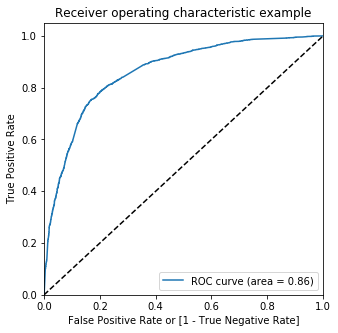

In [220]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Optimal prediction Cutoffs

In [221]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066195,0,1,0,0,0,0,0,0,0,0,0
1,1,0.731980,1,1,1,1,1,1,1,1,1,0,0
2,1,0.968015,1,1,1,1,1,1,1,1,1,1,1
3,0,0.098281,0,1,0,0,0,0,0,0,0,0,0
4,1,0.911361,1,1,1,1,1,1,1,1,1,1,1


In [222]:
# Now let's calculate accuracy sensitivity and specificity for optimal probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383089  1.000000  0.000000
0.1   0.1  0.574398  0.977394  0.324145
0.2   0.2  0.700520  0.912865  0.568657
0.3   0.3  0.775311  0.823263  0.745533
0.4   0.4  0.801134  0.750925  0.832312
0.5   0.5  0.796725  0.672421  0.873915
0.6   0.6  0.774839  0.547883  0.915773
0.7   0.7  0.754999  0.452117  0.943083
0.8   0.8  0.727130  0.345253  0.964267
0.9   0.9  0.688710  0.210029  0.985962


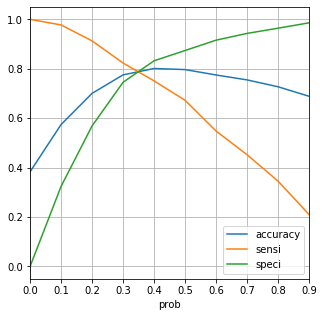

In [223]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (5,5))
plt.grid(True)
plt.show()

In [224]:
# From the above curve 0.32 if the optimal prediction cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066195,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.731980,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.968015,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.098281,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.911361,1,1,1,1,1,1,1,1,1,1,1,1


In [231]:
# Now lets make a new column named as lead score and assign it to y_train_pred_final df.
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.066195,0,1,0,0,0,0,0,0,0,0,0,0,7
1,1,0.731980,1,1,1,1,1,1,1,1,1,0,0,1,73
2,1,0.968015,1,1,1,1,1,1,1,1,1,1,1,1,97
3,0,0.098281,0,1,0,0,0,0,0,0,0,0,0,0,10
4,1,0.911361,1,1,1,1,1,1,1,1,1,1,1,1,91


### Precision  and Recall Metrics

In [226]:
from sklearn.metrics import precision_score, recall_score

In [227]:
precision= precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision

0.7680751173708921

In [228]:
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.6724208795725442

In [248]:
y_train_pred_final.sort_values(["Lead_Score"], ascending = False,inplace=True)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
5814,1,0.996501,1,1,1,1,1,1,1,1,1,1,1,1,100
4781,1,0.997782,1,1,1,1,1,1,1,1,1,1,1,1,100
3560,1,0.997192,1,1,1,1,1,1,1,1,1,1,1,1,100
3735,1,0.997165,1,1,1,1,1,1,1,1,1,1,1,1,100
5500,1,0.998272,1,1,1,1,1,1,1,1,1,1,1,1,100


In [ ]:
# After This we can concluded that , The marketing should focus more on the candidates whose lead scores are more than 80
# as the candidates are more possible to convertec to pursue the course from the company.